In [49]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import pickle
sns.set()
%matplotlib inline

In [11]:
df = pd.read_csv("car data.csv")
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [12]:
df.dtypes

,0
Car_Name,object
Year,int64
Selling_Price,float64
Present_Price,float64
Kms_Driven,int64
Fuel_Type,object
Seller_Type,object
Transmission,object
Owner,int64


In [13]:
df['Transmission'].value_counts()

,count
Transmission,
Manual,261
Automatic,40


In [14]:
df['Seller_Type'].value_counts()

,count
Seller_Type,
Dealer,195
Individual,106


In [15]:
df.isnull().sum()

,0
Car_Name,0
Year,0
Selling_Price,0
Present_Price,0
Kms_Driven,0
Fuel_Type,0
Seller_Type,0
Transmission,0
Owner,0


In [16]:
df.drop('Car_Name',axis=1,inplace=True)

In [17]:
df.columns

Index(['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Fuel_Type',
       'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [19]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [20]:
df['Current_year'] = 2020

In [21]:
df

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2020
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2020
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2020
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2020
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2020
...,...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0,2020
297,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0,2020
298,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0,2020
299,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0,2020


In [22]:
df['Car_Age'] = df['Current_year']-df['Year']

In [23]:
df.drop(['Year','Current_year'],axis=1,inplace=True)

In [24]:
df

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Car_Age
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,6
...,...,...,...,...,...,...,...,...
296,9.50,11.60,33988,Diesel,Dealer,Manual,0,4
297,4.00,5.90,60000,Petrol,Dealer,Manual,0,5
298,3.35,11.00,87934,Petrol,Dealer,Manual,0,11
299,11.50,12.50,9000,Diesel,Dealer,Manual,0,3


In [25]:
df = pd.get_dummies(df,drop_first=True)

In [26]:
df

,Selling_Price,Present_Price,Kms_Driven,Owner,Car_Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,False,True,False,True
1,4.75,9.54,43000,0,7,True,False,False,True
2,7.25,9.85,6900,0,3,False,True,False,True
3,2.85,4.15,5200,0,9,False,True,False,True
4,4.60,6.87,42450,0,6,True,False,False,True
...,...,...,...,...,...,...,...,...,...
296,9.50,11.60,33988,0,4,True,False,False,True
297,4.00,5.90,60000,0,5,False,True,False,True
298,3.35,11.00,87934,0,11,False,True,False,True
299,11.50,12.50,9000,0,3,True,False,False,True


In [27]:
df['Fuel_Type_Diesel'] = df['Fuel_Type_Petrol'].apply(lambda x: 1 if x == True else 0)
df['Fuel_Type_Petrol'] = df['Fuel_Type_Diesel'].apply(lambda x: 1 if x == True else 0)
df['Seller_Type_Individual'] = df['Seller_Type_Individual'].apply(lambda x: 1 if x == True else 0)
df['Transmission_Manual'] = df['Transmission_Manual'].apply(lambda x: 1 if x == True else 0)


In [28]:
df

,Selling_Price,Present_Price,Kms_Driven,Owner,Car_Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,1,1,0,1
1,4.75,9.54,43000,0,7,0,0,0,1
2,7.25,9.85,6900,0,3,1,1,0,1
3,2.85,4.15,5200,0,9,1,1,0,1
4,4.60,6.87,42450,0,6,0,0,0,1
...,...,...,...,...,...,...,...,...,...
296,9.50,11.60,33988,0,4,0,0,0,1
297,4.00,5.90,60000,0,5,1,1,0,1
298,3.35,11.00,87934,0,11,1,1,0,1
299,11.50,12.50,9000,0,3,0,0,0,1


<Axes: >

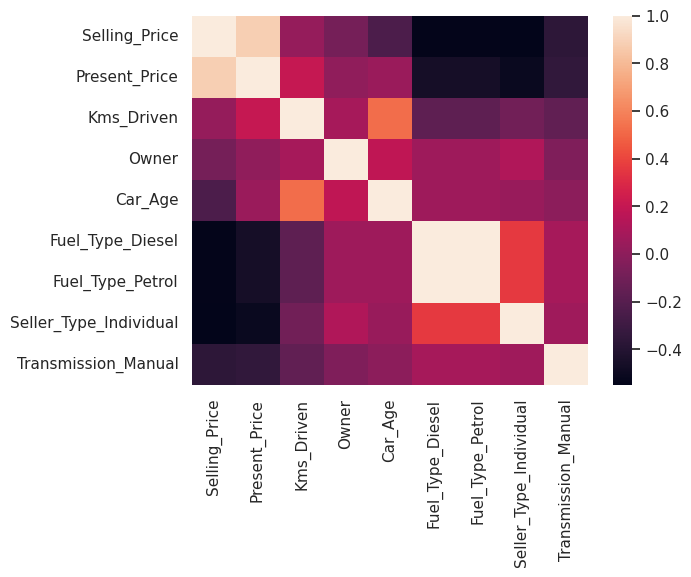

In [29]:
sns.heatmap(df.corr())

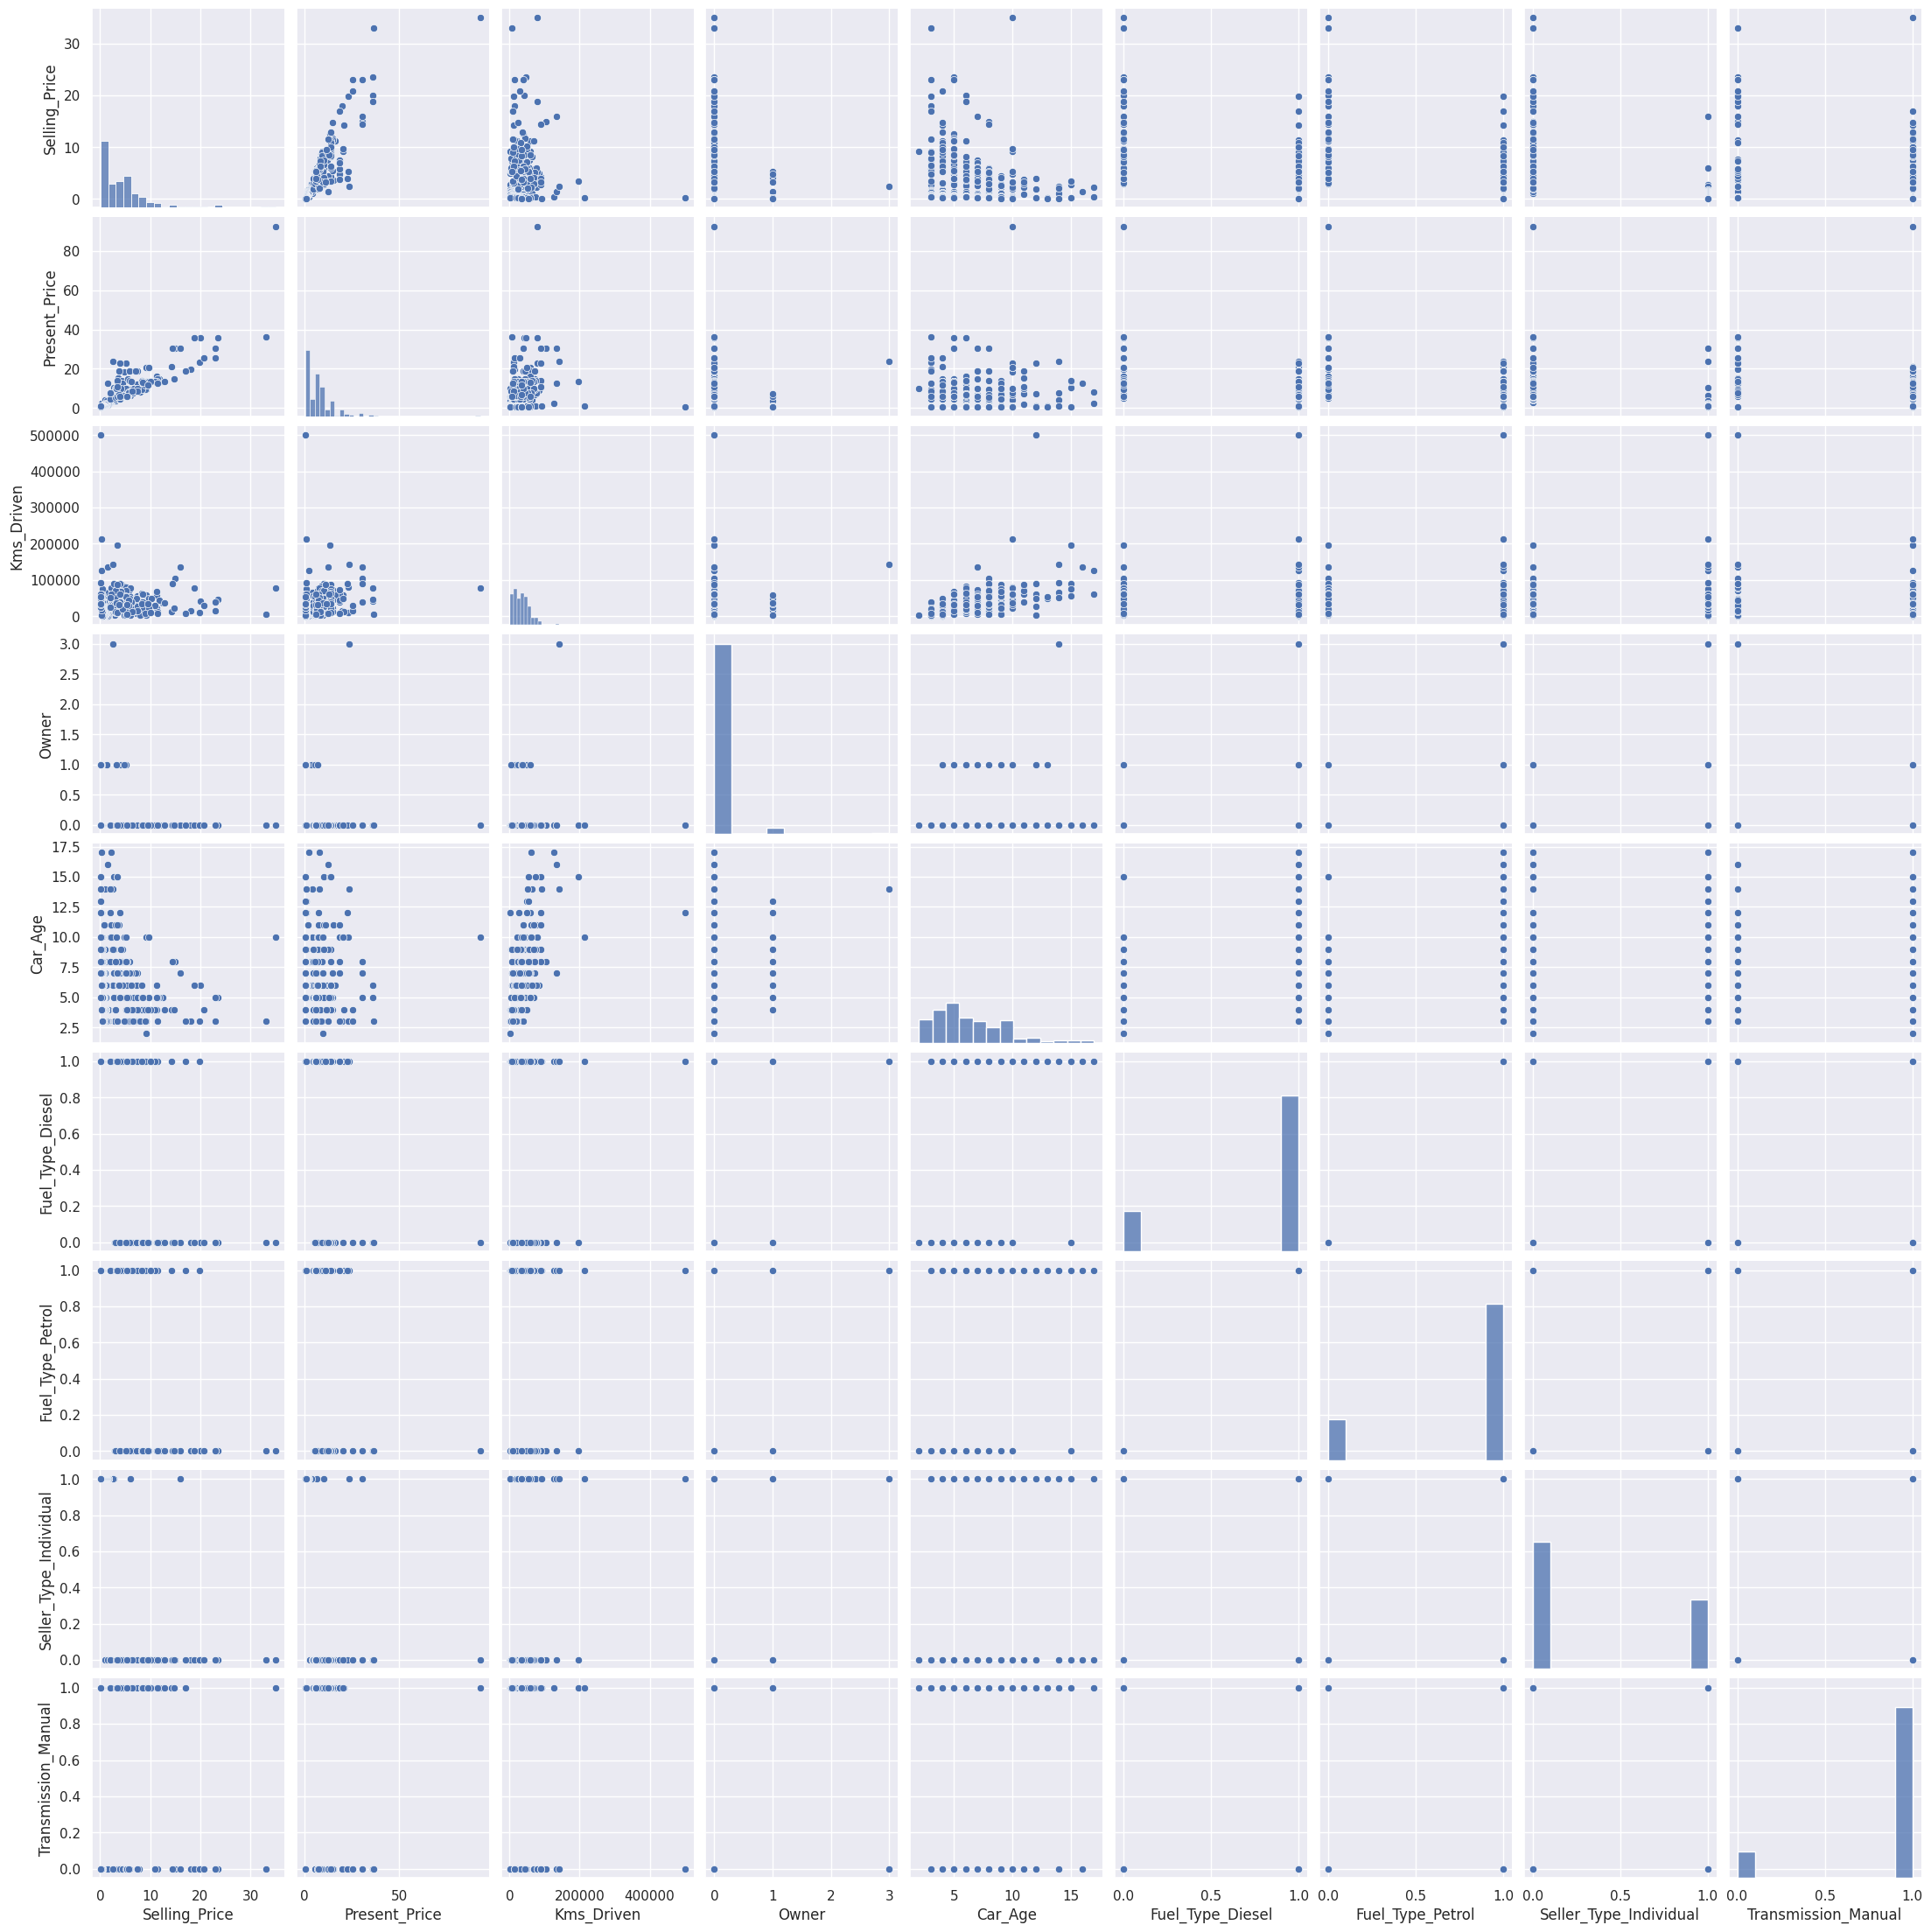

In [30]:
sns.pairplot(df)

<Axes: >

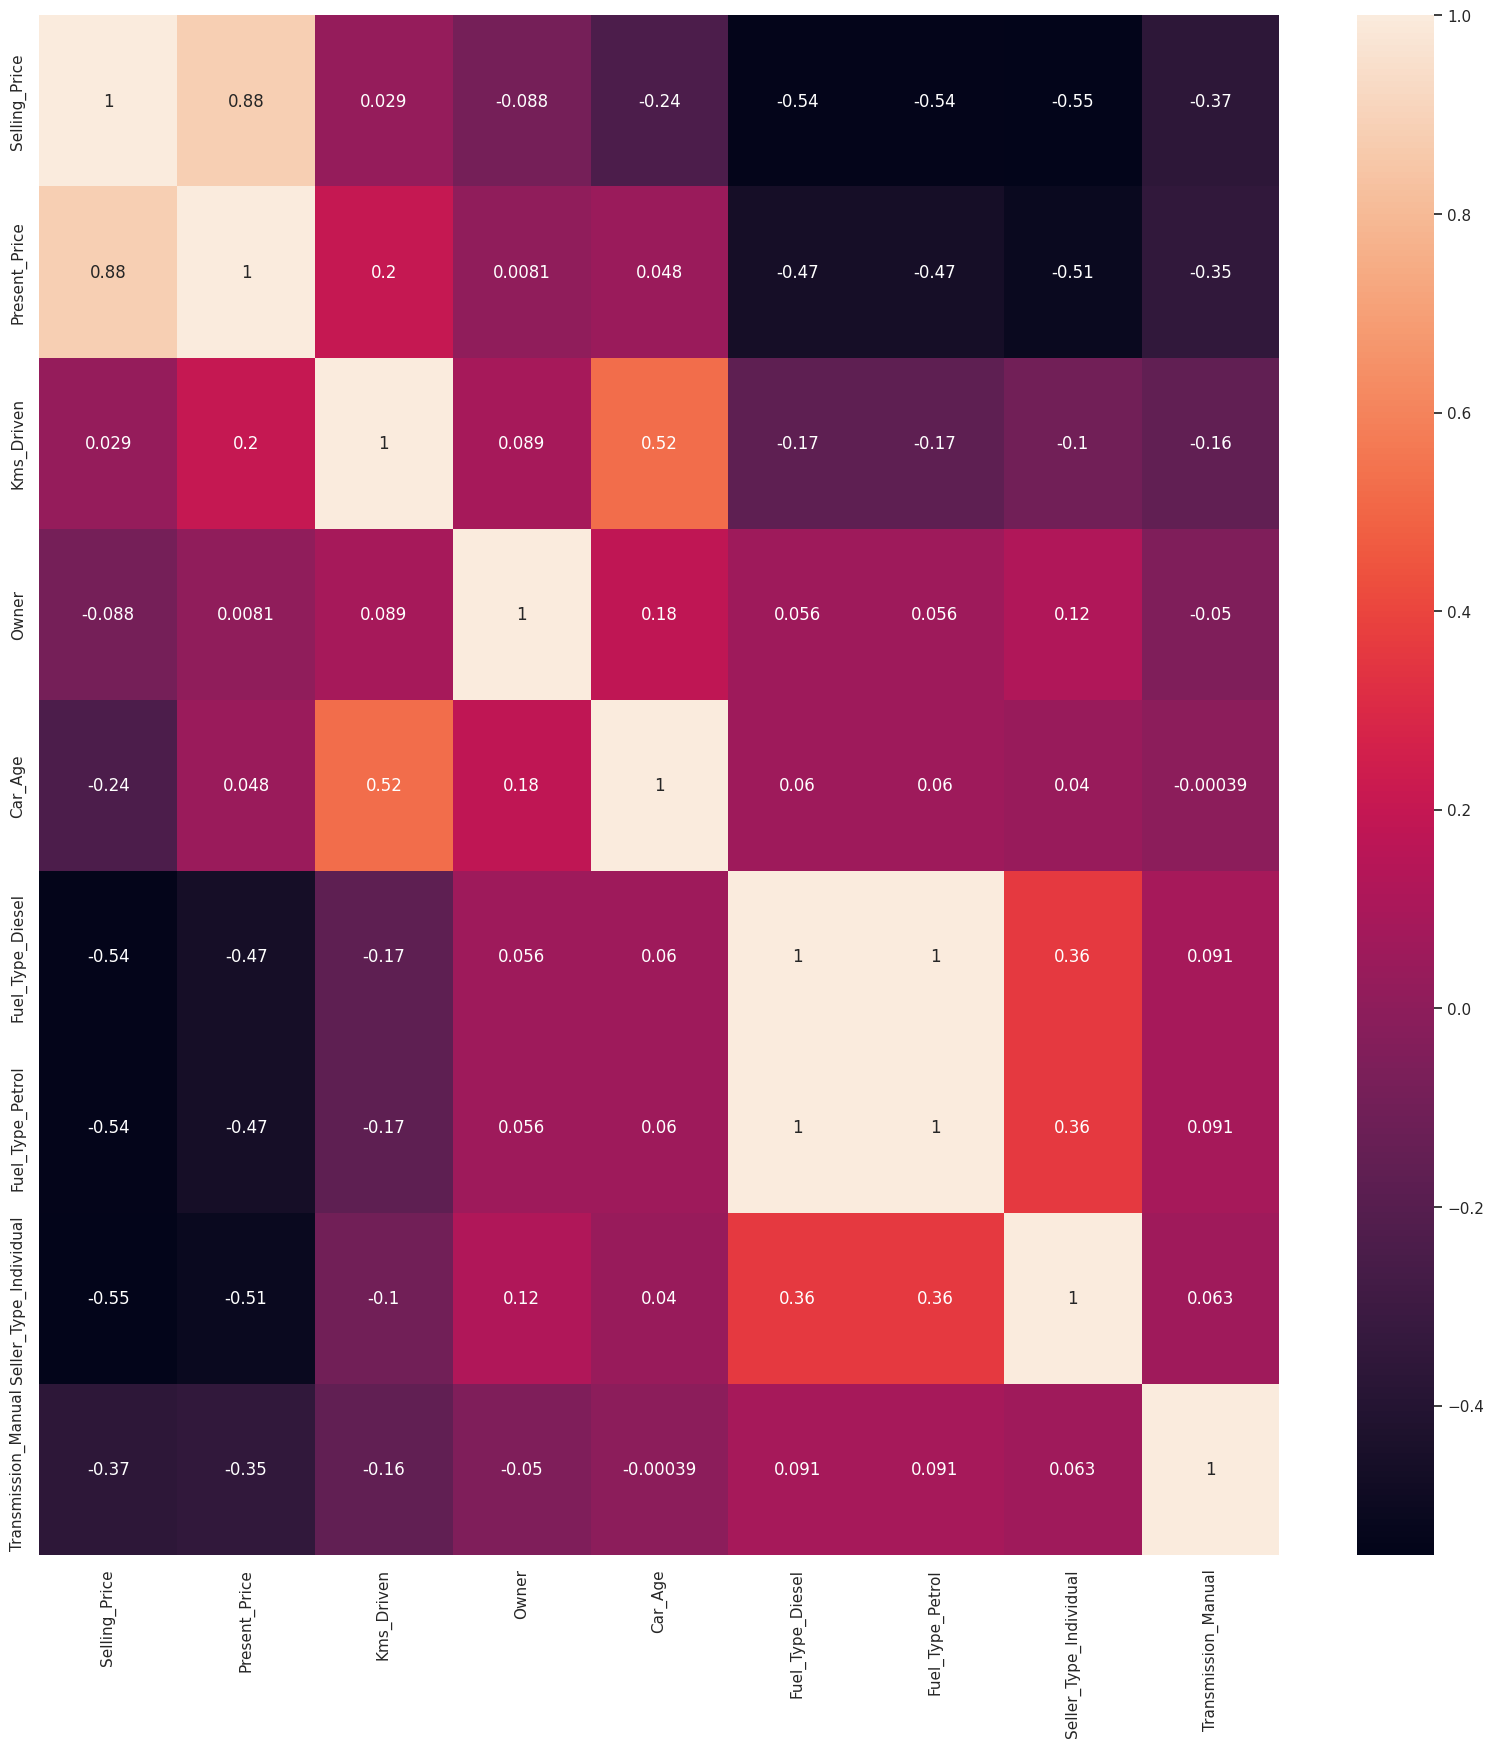

In [31]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True)

In [32]:
df

,Selling_Price,Present_Price,Kms_Driven,Owner,Car_Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,1,1,0,1
1,4.75,9.54,43000,0,7,0,0,0,1
2,7.25,9.85,6900,0,3,1,1,0,1
3,2.85,4.15,5200,0,9,1,1,0,1
4,4.60,6.87,42450,0,6,0,0,0,1
...,...,...,...,...,...,...,...,...,...
296,9.50,11.60,33988,0,4,0,0,0,1
297,4.00,5.90,60000,0,5,1,1,0,1
298,3.35,11.00,87934,0,11,1,1,0,1
299,11.50,12.50,9000,0,3,0,0,0,1


In [33]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [34]:
X

,Present_Price,Kms_Driven,Owner,Car_Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,6,1,1,0,1
1,9.54,43000,0,7,0,0,0,1
2,9.85,6900,0,3,1,1,0,1
3,4.15,5200,0,9,1,1,0,1
4,6.87,42450,0,6,0,0,0,1
...,...,...,...,...,...,...,...,...
296,11.60,33988,0,4,0,0,0,1
297,5.90,60000,0,5,1,1,0,1
298,11.00,87934,0,11,1,1,0,1
299,12.50,9000,0,3,0,0,0,1


In [35]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [36]:
FI = model.feature_importances_

<Axes: >

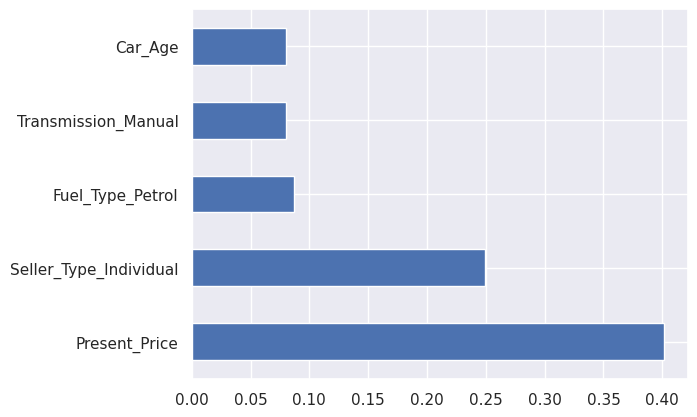

In [37]:
pd.Series(FI,index=X.columns).nlargest(5).plot(kind='barh')

In [38]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=42)

In [39]:
rf = RandomForestRegressor()

In [40]:
n_estimators = [int(x) for x in np.linspace(start=100,stop=1200,num=12)]


In [41]:
#hyper parameter tuning
#trees
n_estimators = [int(x) for x in np.linspace(start=100,stop=1200,num=12)]
#feature
max_features = ['auto','sqrt']
#deapth
max_depth = [int(x) for x in np.linspace(5,30 , num=6)]
#samples split
min_samples_split = [2,5,10,15,20,100]
#leafs
min_samples_leaf = [1,2,5,10]

In [42]:
randomgrid = {
    'n_estimators':n_estimators,
    'max_features':max_features,
    'max_depth':max_depth,
    'min_samples_split':min_samples_split,
    'min_samples_leaf':min_samples_leaf
}

In [43]:
rf_random = RandomizedSearchCV(estimator = rf , param_distributions=randomgrid,scoring='neg_mean_squared_error',n_iter = 10 , cv = 5 ,verbose = 2, random_state=42,n_jobs=1)

In [44]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=700; total time=   1.1s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=700; total time=   1.1s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=700; total time=   1.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=700; total time=   1.1s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=700; total time=   1.1s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=900; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=900; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estim

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
20 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15, 20,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [46]:
yhat = rf_random.predict(X_test)

<ipython-input-48-8059dc7f8ca5>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-yhat)


<Axes: xlabel='Selling_Price', ylabel='Density'>

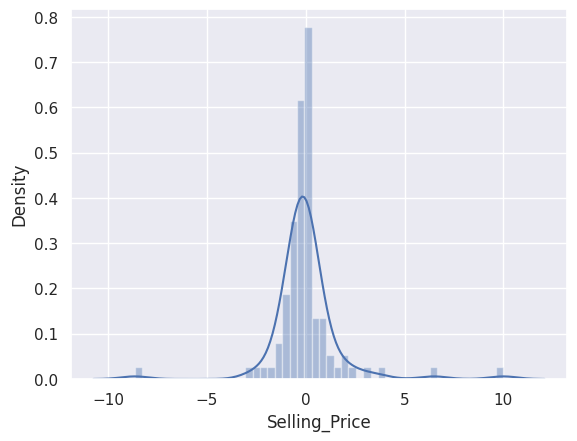

In [48]:
sns.distplot(y_test-yhat)

In [51]:
import pickle

# Open the file in write-binary mode
with open('random_forest_model.pkl', 'wb') as f:
    # Save the model to the file
    pickle.dump(rf_random, f)
